In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [2]:
total_close = pd.read_csv('total_close.csv')

In [3]:
total_close = total_close.drop(['Unnamed: 0'],axis=1)

In [4]:
total_close['Date'] = pd.to_datetime(total_close.Date,format='%Y-%m-%d')
total_close.index = total_close['Date']

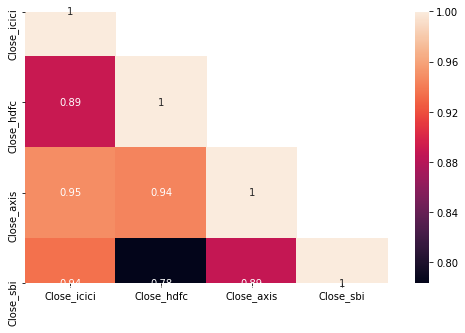

In [5]:
# Compute the correlation matrix
#corelation matrix.
plt.figure(figsize=(10, 10))
cor_mat= total_close.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True)

In [30]:
cor_mat

,Close_icici,Close_hdfc,Close_axis,Close_sbi
Close_icici,1.000000,0.890280,0.948446,0.935630
Close_hdfc,0.890280,1.000000,0.944846,0.783369
Close_axis,0.948446,0.944846,1.000000,0.888123
Close_sbi,0.935630,0.783369,0.888123,1.000000


## Large correlations between all the 4 banks 

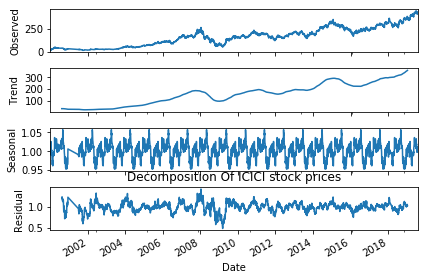

In [6]:

from statsmodels.tsa.seasonal import seasonal_decompose
close = total_close['Close_icici']
result = seasonal_decompose(close, model='multiplicative', freq = 252)
result.plot()
plt.title('Decomposition Of ICICI stock prices')
plt.show()
      

## Gradual Upward trend and a repeating seasonality every year

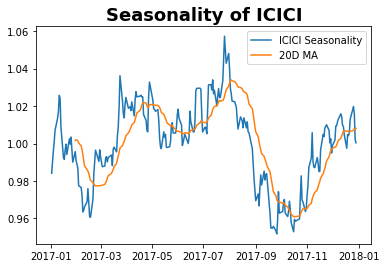

In [7]:
SPY_Seasonality=result.seasonal[result.seasonal.index.year == 2017]
MA1=SPY_Seasonality.rolling(window=20).mean()
plt.plot(SPY_Seasonality, label='ICICI Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of ICICI", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

## Can be seen that there are major lows around October and November and major highs during August

### Check for stationarity

In [8]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = close.rolling(window=12).mean()
    rolstd = close.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

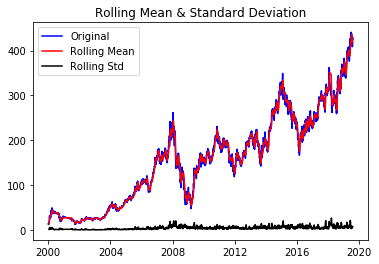

Results of Dickey-Fuller Test:
Test Statistic                   -0.301125
p-value                           0.925345
#Lags Used                        6.000000
Number of Observations Used    4626.000000
Critical Value (1%)              -3.431764
Critical Value (5%)              -2.862165
Critical Value (10%)             -2.567103
dtype: float64


In [40]:
test_stationarity(close)

## Making it non-stationary will be discussed in the Machine learning Notebook

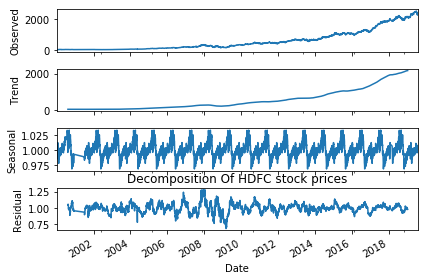

In [11]:
#HDFC
close_hdfc = total_close['Close_hdfc']
result1 = seasonal_decompose(close_hdfc, model='multiplicative', freq = 252)
result1.plot()
plt.title('Decomposition Of HDFC stock prices')
plt.show()
      

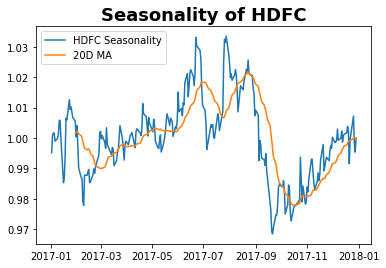

In [18]:
SPY_Seasonality=result1.seasonal[result1.seasonal.index.year == 2017]
MA1=SPY_Seasonality.rolling(window=20).mean()
plt.plot(SPY_Seasonality, label='HDFC Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of HDFC", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

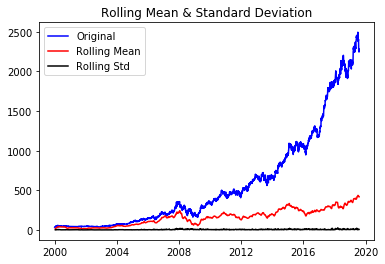

Results of Dickey-Fuller Test:
Test Statistic                    2.741974
p-value                           1.000000
#Lags Used                       26.000000
Number of Observations Used    4606.000000
Critical Value (1%)              -3.431771
Critical Value (5%)              -2.862168
Critical Value (10%)             -2.567104
dtype: float64


In [13]:
test_stationarity(close_hdfc)

## Again HDFC prices are not stationary

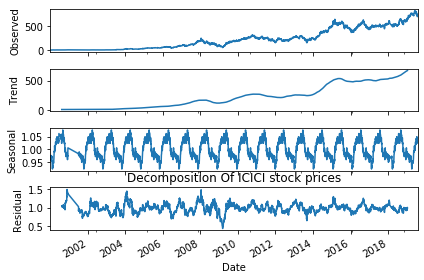

In [15]:
#Axis
close_axis = total_close['Close_axis']
result2 = seasonal_decompose(close_axis, model='multiplicative', freq = 252)
result2.plot()
plt.title('Decomposition Of ICICI stock prices')
plt.show()

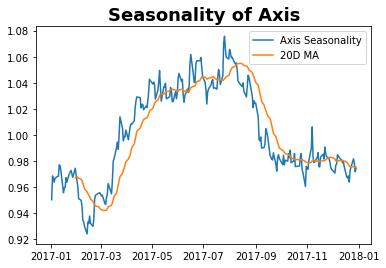

In [19]:
SPY_Seasonality=result2.seasonal[result2.seasonal.index.year == 2017]
MA1=SPY_Seasonality.rolling(window=20).mean()
plt.plot(SPY_Seasonality, label='Axis Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of Axis", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

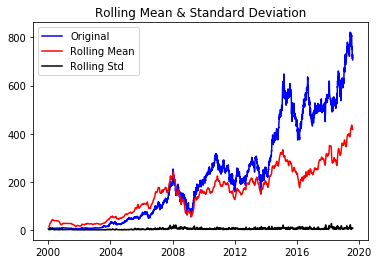

Results of Dickey-Fuller Test:
Test Statistic                    0.131425
p-value                           0.968142
#Lags Used                       19.000000
Number of Observations Used    4613.000000
Critical Value (1%)              -3.431768
Critical Value (5%)              -2.862167
Critical Value (10%)             -2.567104
dtype: float64


In [20]:
test_stationarity(close_axis)

## Axis bank also not stationary

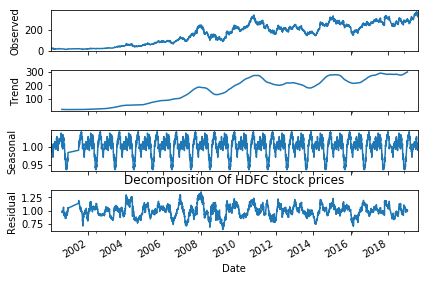

In [21]:
#SBI
close_sbi = total_close['Close_sbi']
result3 = seasonal_decompose(close_sbi, model='multiplicative', freq = 252)
result3.plot()
plt.title('Decomposition Of HDFC stock prices')
plt.show()

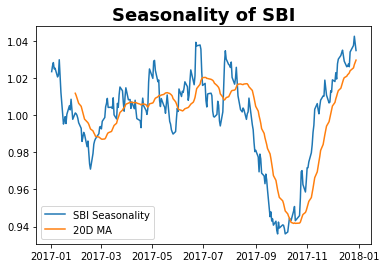

In [23]:
SPY_Seasonality=result3.seasonal[result3.seasonal.index.year == 2017]
MA1=SPY_Seasonality.rolling(window=20).mean()
plt.plot(SPY_Seasonality, label='SBI Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of SBI", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

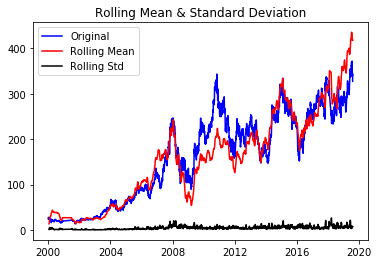

Results of Dickey-Fuller Test:
Test Statistic                   -1.433690
p-value                           0.566022
#Lags Used                        1.000000
Number of Observations Used    4631.000000
Critical Value (1%)              -3.431763
Critical Value (5%)              -2.862164
Critical Value (10%)             -2.567102
dtype: float64


In [46]:
test_stationarity(close_sbi)

## All 4 banks are non-stationary dealing with them will be shown in Machine learning notebooks